### Abrir archivo features


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/training_r21d_all_10_mean.csv')       # data training con el target
X_train = df.iloc[:,1:-2]
Y_train = df.iloc[:, -2]
# print(X_train)
# print(Y_train)

In [3]:
df = pd.read_csv('./datasets/val_r21d_complete_10.csv')       # data training con el target
X_val = df.iloc[:,1:-3]
Y_val = df.iloc[:, -3]
# print(X_val)
# print(Y_val)

In [4]:
df = pd.read_csv('./datasets/test_r21d_complete_10.csv')       # data training con el target
X_test = df.iloc[:,1:-1]
# print(X_test)

### Reducción de dimensionalidad


In [5]:
def graph_components(num_components, method, varianza_explicada):
    plt.figure(figsize=(10, 6))
    plt.bar(num_components, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
    plt.step(num_components, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.title('Scree Plot de ' + method)
    plt.legend(loc='best')
    plt.axhline(y=95, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
    plt.show()

#### PCA


data scaled
[[ 1.83620439 -0.91279091 -0.1195221  ... -0.66089667 -0.72470607
   0.90035303]
 [-0.30091796 -0.76995632  0.64169529 ... -0.3880678  -0.41626473
   0.26794282]
 [-0.46746561  1.81652137  0.0668968  ... -0.75397902 -0.26417388
  -0.57057412]
 ...
 [-1.31747121 -0.66253198 -0.56619558 ... -0.79620616  0.55276125
   0.58199193]
 [-0.12969289 -0.00435783 -0.64283866 ... -0.61261338 -0.5825971
   1.01780216]
 [ 0.27850179  0.04875291 -0.71099374 ...  0.03093929 -0.53175494
  -0.06855909]]
max 11.948867782324974
min -2.0542499510158576


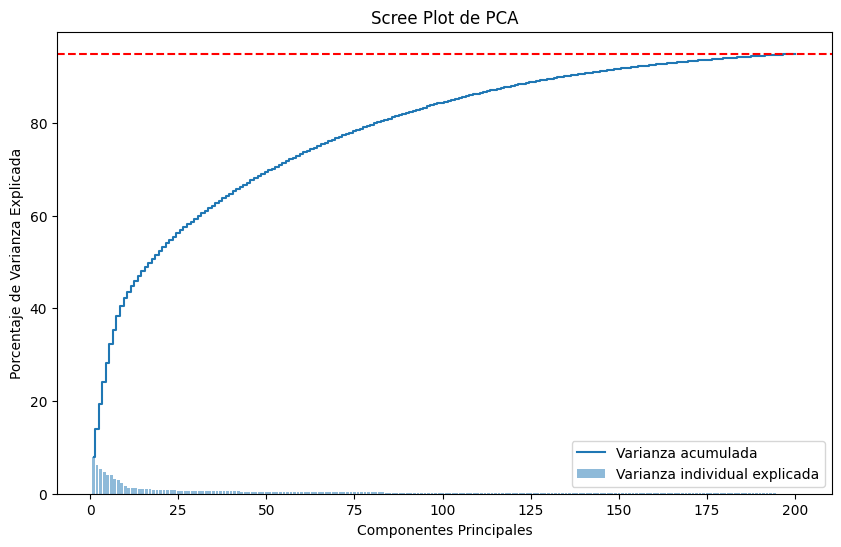

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

print("data scaled")
print(data_scaled)
print("max", np.max(data_scaled))
print("min", np.min(data_scaled))

X_train_scaled = data_scaled

# Define the parameter grid

# Ajustar el PCA
pca = PCA(n_components=200)
pca.fit(X_train_scaled)


# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100

# Número de componentes
num_componentes = np.arange(len(varianza_explicada)) + 1

#print(varianza_explicada)
#print(num_components)
#print(pca.explained_variance_ratio_.sum())
#print(pca.singular_values_)

graph_components(num_componentes, "PCA", varianza_explicada)


In [7]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 135


In [8]:
pca = PCA(n_components=140)
pca.fit(X_train_scaled)

# Transformar los datos al nuevo espacio
features_transformed = pca.transform(X_train_scaled)      # features_transformed es un numpy array
X_train_pca = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Transformar los datos al nuevo espacio
features_transformed = pca.transform(X_test_scaled)      # features_transformed es un numpy array
X_test_pca = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Transformar los datos al nuevo espacio
features_transformed = pca.transform(X_val_scaled)      # features_transformed es un numpy array
X_val_pca = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

#### Truncated SVD

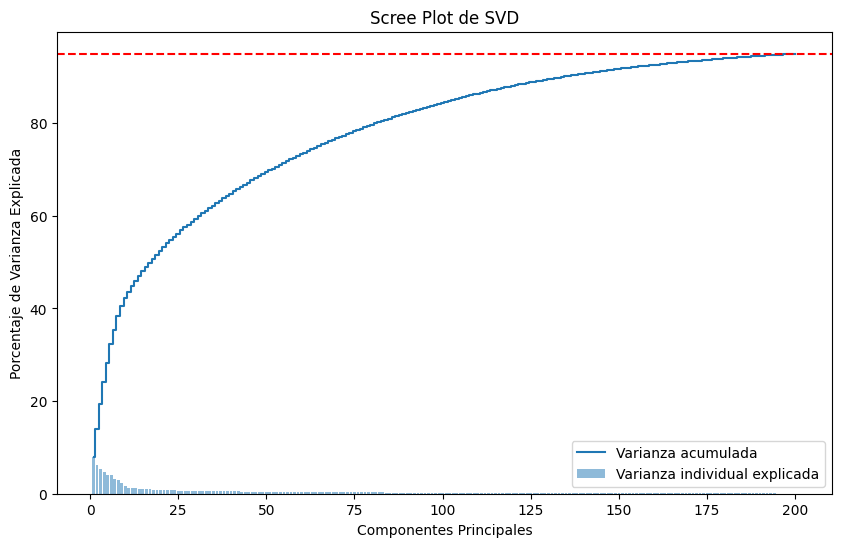

In [9]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components=200, n_iter=5, random_state=42) #cambiar numero de componentes
svd.fit(X_train_scaled)

# Porcentaje de varianza explicada por cada componente
varianza_explicada = svd.explained_variance_ratio_ * 100

# Número de componentes
num_components = np.arange(len(varianza_explicada)) + 1

#print(varianza_explicada)
#print(num_components)
#print(svd.explained_variance_ratio_.sum())
#print(svd.singular_values_)

graph_components(num_components, "SVD", varianza_explicada)

In [10]:
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 135


In [11]:
svd = TruncatedSVD(n_components=135, n_iter=5, random_state=42) #cambiar numero de componentes
svd.fit(X_train_scaled)

# Transformar los datos al nuevo espacio
features_transformed = svd.transform(X_train_scaled)      # features_transformed es un numpy array
X_train_svd = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

# Transformar los datos al nuevo espacio
features_transformed = svd.transform(X_test_scaled)      # features_transformed es un numpy array
X_test_svd = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Transformar los datos al nuevo espacio
features_transformed = svd.transform(X_val_scaled)      # features_transformed es un numpy array
X_val_svd = pd.DataFrame(features_transformed)   # features_imputed es un DataFrame de pandas

### LDA

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])
#clf = LinearDiscriminantAnalysis()
#X_lda = clf.fit_transform(X, y)
#LinearDiscriminantAnalysis()
#print(clf.predict([[-0.8, -1]]))

### Gaussian Random projection


In [13]:
#from sklearn import random_projection
#gauss_rand = random_projection.GaussianRandomProjection(eps=.8)
#X_gaussian = gauss_rand.fit_transform(X)
#X_gaussian.shape

In [14]:
# graph_components(n_components_range,X_gaussian)

### Factor Analysis

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
X, _ = load_digits(return_X_y=True)
transformer = FactorAnalysis(n_components=7, random_state=0)
X_fa = transformer.fit_transform(X)
X_fa.shape

(1797, 7)

### Accuracy testing

#### Kmeans

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [58]:
from kmeans import kmeans

# Calculates number of clusters so that it's equal to the number of labels 
n_clusters = len(np.unique(Y_train_encoded))
print(n_clusters)
X_train_pca_np = X_train_pca.to_numpy()
data = X_train_pca_np.reshape(-1, 1)
print(data)
umbral = 0.3
centroides_km_pca, clusters_km_pca = kmeans(data, n_clusters, umbral)

10
[[-6.79777789]
 [ 4.3382766 ]
 [ 1.27931445]
 ...
 [ 1.15247715]
 [ 0.18504425]
 [ 0.15949125]]


In [36]:

# Calculates number of clusters so that it's equal to the number of labels 
n_clusters = len(np.unique(Y_train_encoded))
print(n_clusters)
X_train_svd_np = X_train_svd.to_numpy()
data = X_train_svd_np.reshape(-1, 1)
print(data)
umbral = 0.3
centroides_km_svd, clusters_km_svd = kmeans(data, n_clusters, umbral)

10
[[-6.79777789]
 [ 4.3382766 ]
 [ 1.27931445]
 ...
 [ 0.67028552]
 [ 0.11573526]
 [-0.05884624]]


#### DBSCAN

In [59]:
from dbscan import DBSCAN
radio = 1000
vecinos_min = 300

labels_db_pca = DBSCAN(X_train_pca_np, radio, vecinos_min)
labels_db_svd = DBSCAN(X_train_svd_np, radio, vecinos_min)

#### Resultados

In [60]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import mutual_info_score

print(X_train_svd_np.shape)
print(Y_train_encoded.shape)
print(clusters_km_svd.shape)
print(clusters_km_pca.shape)
print(labels_db_svd)
print(type(Y_train_encoded))

(5424, 135)
(5424,)
(732240,)
(759360,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [25]:
ri_pc_km = rand_score(Y_train_encoded, clusters_km_pca)
ri_svd_km = rand_score(Y_train_encoded, clusters_km_svd)
#sc_pc_km = silhouette_score(Y_train_encoded, clusters_km_pca)
#sc_svd_km = silhouette_score(Y_train_encoded, clusters_km_svd)
mi_pc_km = mutual_info_score(Y_train_encoded, clusters_km_pca)
mi_svd_km = mutual_info_score(Y_train_encoded, clusters_km_svd)

print("El rand index de kmeans con pca es: ", ri_pc_km)
print("El rand index de kmeans con svd es: ", ri_svd_km)
#print("El silhouette coefficient de kmeans con pca es: ", sc_pc_km)
#print("El silhouette coefficient de kmeans con svd es: ", sc_svd_km)
print("El mutual information de kmeans con pca es: ", sc_pc_km)
print("El mutual information de kmeans con svd es: ", sc_svd_km)

ValueError: Found input variables with inconsistent numbers of samples: [5424, 759360]

In [88]:
labels_db_pca_np = np.array(labels_db_pca)
labels_db_svd_np = np.array(labels_db_svd)

print(labels_db_pca_np.shape)
print(labels_db_svd_np.shape)
print(Y_train_encoded.shape)

ri_pc_db = rand_score(Y_train_encoded, labels_db_pca_np)
ri_svd_db = rand_score(Y_train_encoded, labels_db_svd_np)
print("El rand index de DBSCAN con pca es: ", ri_pc_db)
print("El rand index de DBSCAN con svd es: ", ri_svd_db)

Y_train_encoded_np = Y_train_encoded.reshape(-1, 1)

print(Y_train_encoded_np.shape)

#sc_pc_db = silhouette_score(Y_train_encoded, labels_db_pca_np)
#sc_svd_db = silhouette_score(Y_train_encoded, labels_db_svd_np)
#print("El silhouette coefficient de DBSCAN con pca es: ", sc_pc_db)
#print("El silhouette coefficient de DBSCAN con svd es: ", sc_svd_db)

mi_pc_db = mutual_info_score(Y_train_encoded, labels_db_pca_np)
mi_svd_db = mutual_info_score(Y_train_encoded, labels_db_svd_np)

print("El mutual information de DBSCAN con pca es: ", mi_pc_db)
print("El mutual information de DBSCAN con svd es: ", mi_svd_db)

(5424,)
(5424,)
(5424,)
El rand index de DBSCAN con pca es:  0.10584948463253585
El rand index de DBSCAN con svd es:  0.10584948463253585
(5424, 1)
El mutual information de DBSCAN con pca es:  0.0
El mutual information de DBSCAN con svd es:  0.0
